Consider a one-dimensional random walker that can move every second. With probability pl = 1/3 it moves
to the left, with probability pr = 1/3 it moves to right, and with probability ps = 1/3 it rests/stays and does
not move. Assuming at time t = 0, the random walker is at x = 0, plot the probability density function and
the cumulative probability function for t = 10, t = 100, and t = 1000 seconds. Make just two plots; each
showing all three time points. Remember that you need to simulate random walks many times to get good
statistics. Make the same two plots for pl = 0, pr = 1/2, and ps = 1/2. Do you understand why these plots
look different? The plots that you make should be designed well. For example, they should label curves,
axes, etc.

In [45]:
class randwalker():
    
    import random 
    
    def __init__(self, pl, pr, ps):
        """
        initializing the percentages, walk record, and current location
        """
        self.pl = pl
        self.pr = pr
        self.ps = ps
        self.walk = []
        self.curr = 0
        
    def steps(self, t):
        """
        takes t amount of steps
        """
        self.walk = []
        self.curr = 0
        for i in range(t):
            x = random.choices(population = ['l','r','s'], weights = [self.pl, self.pr, self.ps])
            if x == ['l']:
                self.curr -= 1
            if x == ['r']:
                self.curr += 1
            self.walk.append(self.curr)
            
    def get_walk(self):
        """
        return the history of positions of the walker 
        """
        return self.walk
    
    def get_end(self,m):
        """
        finds t=m for 10000 walks 
        """
        n = []
        for i in range(10000):
            self.steps(m)
            n.append(self.walk[-1])
        return n
    

In [84]:
import matplotlib.pyplot as plt
import numpy as np

In [69]:
"""
creating a random walker object, and finding the locations for three locations with 1/3 probability
"""
r1 = randwalker(1/3,1/3,1/3)
a = r1.get_end(10)
b = r1.get_end(100)
c = r1.get_end(1000)

Text(0, 0.5, 'Probability')

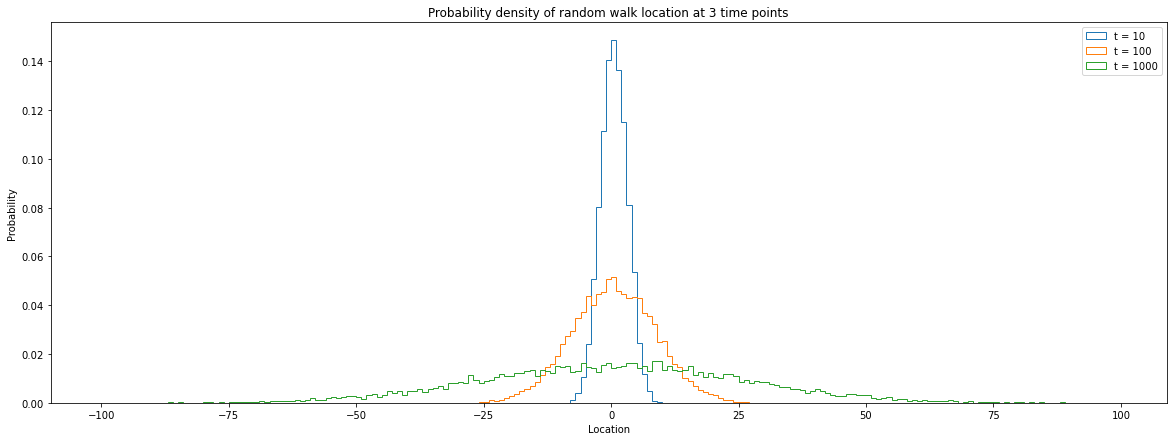

In [78]:
"""
graphing the probability density of a, b, and c
"""
fig = plt.figure(figsize=(20,7))
plt.hist(a, bins = range(-50,50), histtype='step', density=True, label = "t = 10")
plt.hist(b, bins = range(-50,50), histtype='step', density=True, label = "t = 100")
plt.hist(c, bins = range(-100,100), histtype='step', density=True, label = "t = 1000")
plt.title('Probability density of random walk location at 3 time points')
plt.legend()
plt.xlabel("Location")
plt.ylabel("Probability")


In [71]:
def cumulative(x, X): 
    """
    Creates the cumulative of x
    """
    F = np.zeros(x.size)
    for i in range(x.size):
        F[i] = (X <= x[i]).mean()
    return F

Text(0, 0.5, 'Probability')

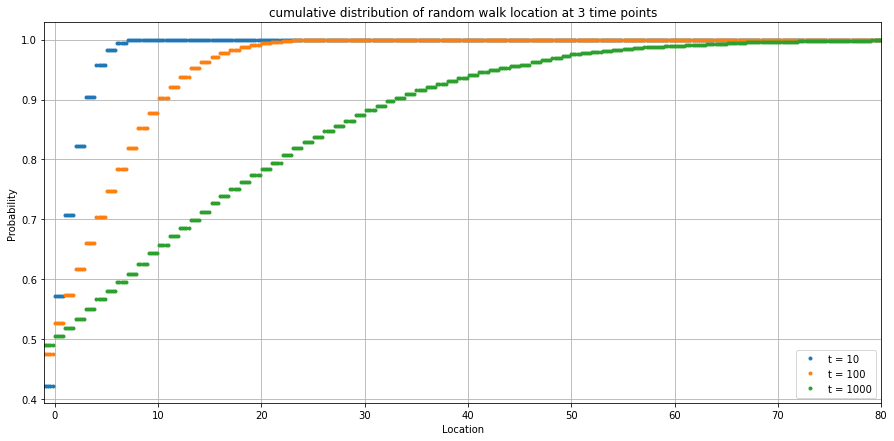

In [81]:
"""
graph cumulative distribution of a, b, and c
"""
x = np.linspace(-1, 100, 500)
A = cumulative(x, a)
B = cumulative(x, b)
C = cumulative(x, c)

fig = plt.figure(figsize=(15,7))
plt.plot(x, A,'.', label = "t = 10")
plt.plot(x, B,'.', label = "t = 100")
plt.plot(x, C,'.', label = "t = 1000")

plt.xlim([-1, 80])
plt.grid()
plt.title('cumulative distribution of random walk location at 3 time points')
plt.legend()
plt.xlabel("Location")
plt.ylabel("Probability")

In [87]:
"""
creating a second random walker object, and finding the locations for three locations with 0, 1/2, 1/2 probability
"""
r2 = randwalker(0,1/2,1/2)
d = r2.get_end(10)
e = r2.get_end(100)
f = r2.get_end(1000)

Text(0, 0.5, 'Probability')

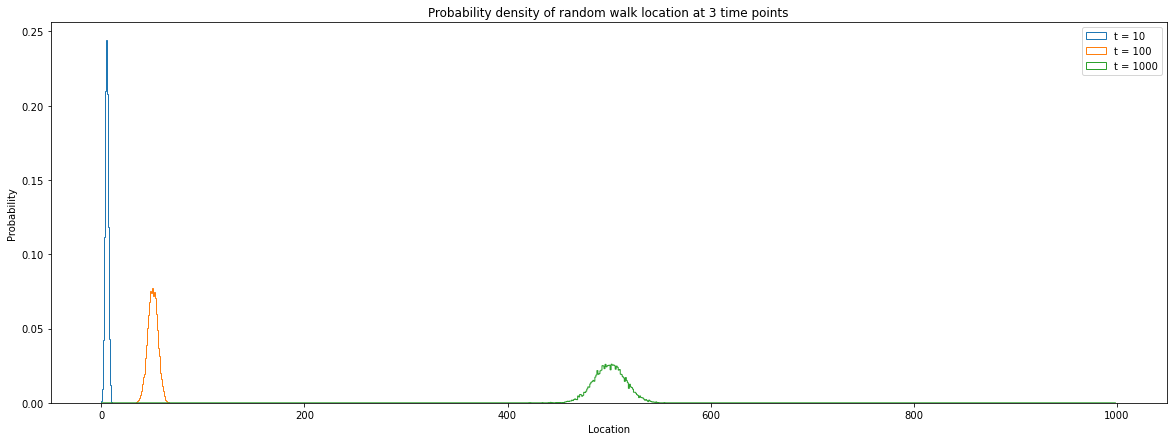

In [91]:
"""
graphing the probability density of d, e, and f
"""
fig = plt.figure(figsize=(20,7))
plt.hist(d, bins = range(0,100), histtype='step', density=True, label = "t = 10")
plt.hist(e, bins = range(0,100), histtype='step', density=True, label = "t = 100")
plt.hist(f, bins = range(0,1000), histtype='step', density=True, label = "t = 1000")
plt.title('Probability density of random walk location at 3 time points')
plt.legend()
plt.xlabel("Location")
plt.ylabel("Probability")


Text(0, 0.5, 'Probability')

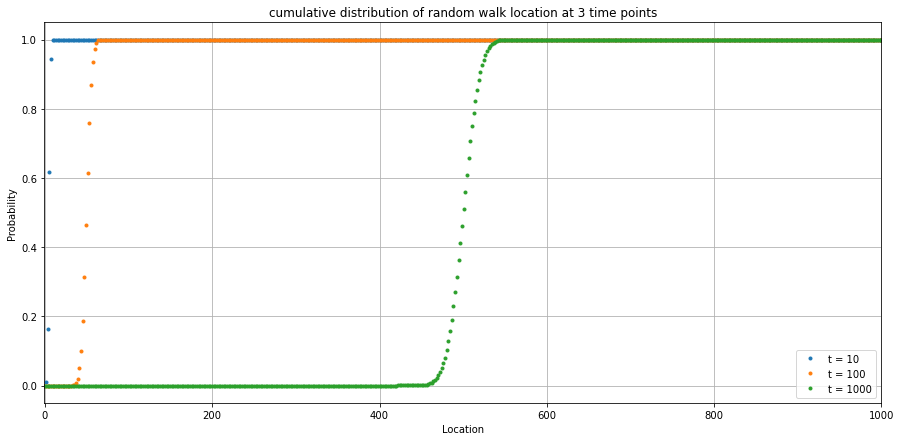

In [93]:
"""
graph cumulative distribution of d, e, and f
"""

x = np.linspace(-1, 1000, 500)
D = cumulative(x, d)
E = cumulative(x, e)
F = cumulative(x, f)

fig = plt.figure(figsize=(15,7))
plt.plot(x, D,'.', label = "t = 10")
plt.plot(x, E,'.', label = "t = 100")
plt.plot(x, F,'.', label = "t = 1000")

plt.xlim([-1, 1000])
plt.grid()
plt.title('cumulative distribution of random walk location at 3 time points')
plt.legend()
plt.xlabel("Location")
plt.ylabel("Probability")

The plots look different, because the second random walk object has a left step probability of 0. This means that the walk will only go in the right direction, making the entire walk positive. As a result, all of the graphs of the second set of walks have much larger probability densities and cumulative distributions